In [1]:
import numpy as np
import glob
import os

## Lauren's Data Chunking Script

In [2]:
# given a list of data file paths, return one list containing recording data, each element in list 
# is an np.array containing entire recording
def csv_to_np(data_list_name):
    recordings = []
    for ind, recording in enumerate(data_list_name):
        recording_np = np.genfromtxt(recording, delimiter=',')
        recordings.append(recording_np)
    return recordings


# Transfer from 10s recordings to 300, 3 data chunks
# Each recording contributes NUM_CHUNKS_PER_RECORDING chunks to output to retain evenly distributed data
# ASSUMPTIONS: input parameter recordings is a list of np arrays of recordings
def chunk_data(recordings, n_samples_per_chunk, n_meas_per_samp, n_chunks_per_rec):
    NUM_SAMPLES_PER_CHUNK = n_samples_per_chunk
    NUM_MEASUREMENTS_PER_SAMPLE = n_meas_per_samp
    NUM_CHUNKS_PER_RECORDING = n_chunks_per_rec 
    
    out = []
    for recording in recordings:
        press_inds = np.argwhere(recording[:,0]==1).squeeze()
        num_samples_pressed = recording[press_inds,:].shape[0]
        
        # CASE 0: check that we have at least 300 samples in entire recording
        if recording.shape[0] < NUM_SAMPLES_PER_CHUNK:
            sample_pad = np.zeros((NUM_SAMPLES_PER_CHUNK,NUM_MEASUREMENTS_PER_SAMPLE))
            sample_pad[0:recording.shape[0],:] = recording[:,1:]
            out.append(sample_pad)
        
        # CASE 1: we have enough  samples to fill out chunks with only press data
        elif num_samples_pressed >= NUM_SAMPLES_PER_CHUNK + NUM_CHUNKS_PER_RECORDING:
            
            # First chunk (always capture very beginning of data)
            first_chunk_start = press_inds[0]
            out.append(recording[first_chunk_start:first_chunk_start+NUM_SAMPLES_PER_CHUNK,1:])
            
            # Last chunk (always capture very end of data)
            last_chunk_start = press_inds[-1]-NUM_SAMPLES_PER_CHUNK+1
            out.append(recording[last_chunk_start:last_chunk_start+NUM_SAMPLES_PER_CHUNK,1:])
            
            # Middle chunks (evenly space from first chunk for simplicity)
            step = num_samples_pressed // NUM_CHUNKS_PER_RECORDING
            prev_chunk_start = first_chunk_start
            for i in range(NUM_CHUNKS_PER_RECORDING-2):
                next_chunk_start = prev_chunk_start+step
                out.append(recording[next_chunk_start:next_chunk_start+NUM_SAMPLES_PER_CHUNK,1:])
                prev_chunk_start = next_chunk_start
                
        # CASE 2: We don't have enough samples to fill chunks: need to pull from surrounding data
        elif num_samples_pressed < NUM_SAMPLES_PER_CHUNK + NUM_CHUNKS_PER_RECORDING:
            # First chunk: captures until end of recording, starting however many samples before needed to do that
            first_chunk_start = max(0, press_inds[-1]-NUM_SAMPLES_PER_CHUNK+1)
            out.append(recording[first_chunk_start:first_chunk_start+NUM_SAMPLES_PER_CHUNK,1:])
            
            # Last chunk: captures from start of recording, going however many samples after needed to do that
            last_chunk_end = min(recording.shape[0], press_inds[0]+NUM_SAMPLES_PER_CHUNK)
            out.append(recording[last_chunk_end-NUM_SAMPLES_PER_CHUNK:last_chunk_end,1:])
            
            # Middle chunks: (evenly space from first chunk for simplicity)
            step = (last_chunk_end - first_chunk_start+1) // NUM_CHUNKS_PER_RECORDING
            prev_chunk_start = first_chunk_start
            for i in range(NUM_CHUNKS_PER_RECORDING-2):
                next_chunk_start = prev_chunk_start+step
                out.append(recording[next_chunk_start:next_chunk_start+NUM_SAMPLES_PER_CHUNK,1:])
                prev_chunk_start = next_chunk_start
                
    return out

## for every name and every letter
## output_A_name

# # Note: train obtained from running Splitting_up_data.ipynb on raw training data
# train = ['Data/A_lauren_11.csv', 'Data/A_lauren_18.csv', 'Data/A_lauren_20.csv', 'Data/B_lauren_14.csv',\
#          'Data/B_lauren_15.csv', 'Data/B_lauren_17.csv', 'Data/C_lauren_28.csv', 'Data/C_lauren_18.csv', \
#          'Data/C_lauren_3.csv', 'Data/D_lauren_8.csv', 'Data/D_lauren_23.csv', 'Data/D_lauren_4.csv',\
#          'Data/E_lauren_5.csv', 'Data/E_lauren_7.csv', 'Data/E_lauren_25.csv', 'Data/F_lauren_4.csv', \
#          'Data/F_lauren_26.csv', 'Data/F_lauren_2.csv', 'Data/G_lauren_4.csv', 'Data/G_lauren_8.csv',\
#          'Data/G_lauren_13.csv', 'Data/H_lauren_29.csv', 'Data/H_lauren_23.csv', 'Data/H_lauren_22.csv', \
#          'Data/I_lauren_19.csv', 'Data/I_lauren_22.csv', 'Data/I_lauren_8.csv', 'Data/J_lauren_1.csv', \
#          'Data/J_lauren_16.csv', 'Data/J_lauren_23.csv', 'Data/K_lauren_1.csv', 'Data/K_lauren_10.csv', \
#          'Data/K_lauren_23.csv', 'Data/L_lauren_30.csv', 'Data/L_lauren_6.csv', 'Data/L_lauren_26.csv', \
#          'Data/M_lauren_21.csv', 'Data/M_lauren_3.csv', 'Data/M_lauren_19.csv', 'Data/N_lauren_1.csv', \
#          'Data/N_lauren_14.csv', 'Data/N_lauren_25.csv', 'Data/O_lauren_17.csv', 'Data/O_lauren_10.csv', \
#          'Data/O_lauren_28.csv', 'Data/P_lauren_22.csv', 'Data/P_lauren_29.csv', 'Data/P_lauren_3.csv', \
#          'Data/Q_lauren_10.csv', 'Data/Q_lauren_29.csv', 'Data/Q_lauren_23.csv', 'Data/R_lauren_4.csv', \
#          'Data/R_lauren_8.csv', 'Data/R_lauren_12.csv', 'Data/S_lauren_27.csv', 'Data/S_lauren_12.csv', \
#          'Data/S_lauren_18.csv', 'Data/T_lauren_9.csv', 'Data/T_lauren_21.csv', 'Data/T_lauren_7.csv', \
#          'Data/U_lauren_11.csv', 'Data/U_lauren_24.csv', 'Data/U_lauren_3.csv', 'Data/V_lauren_5.csv', \
#          'Data/V_lauren_26.csv', 'Data/V_lauren_10.csv', 'Data/W_lauren_19.csv', 'Data/W_lauren_2.csv', \
#          'Data/W_lauren_18.csv', 'Data/X_lauren_2.csv', 'Data/X_lauren_28.csv', 'Data/X_lauren_8.csv', \
#          'Data/Y_lauren_29.csv', 'Data/Y_lauren_3.csv', 'Data/Y_lauren_17.csv', 'Data/Z_lauren_8.csv', \
#          'Data/Z_lauren_20.csv', 'Data/Z_lauren_23.csv']
# recordings = csv_to_np(train)
# assert len(recordings) == len(train)
# NUM_SAMPLES_PER_CHUNK = 300
# NUM_MEASUREMENTS_PER_SAMPLE = 3
# NUM_CHUNKS_PER_RECORDING = 5
# chunks = chunk_data(recordings, NUM_SAMPLES_PER_CHUNK, NUM_MEASUREMENTS_PER_SAMPLE, NUM_CHUNKS_PER_RECORDING)
# print("executed")

## Katherine's Data Zero Padding,with max length 300

In [161]:
# given a list of data file paths, return one list containing recording data, each element in list 
# is an np.array containing entire recording
def csv_to_np(data_list_name):
    recordings = []
    for ind, recording in enumerate(data_list_name):
        recording_np = np.genfromtxt(recording, delimiter=',')
        recordings.append(recording_np)
    return recordings


# Transfer from 10s recordings to 300, 3 data chunks
# Each recording contributes NUM_CHUNKS_PER_RECORDING chunks to output to retain evenly distributed data
# ASSUMPTIONS: input parameter recordings is a list of np arrays of recordings
def zp_data(rec, chunk_length):
    recording = np.squeeze(np.asarray(rec))
    press_inds = np.argwhere(recording[:,0]==1).squeeze()
    sample = recording[press_inds,1:4];
    num_samples_pressed = recording[press_inds,:].shape[0]
    out = np.zeros((chunk_length,3))
    # CASE 0: check that we have at least 300 samples in entire recording
    if num_samples_pressed <= chunk_length:
        out[0:num_samples_pressed,:] = sample
    else:
        out[0:chunk_length,:] = sample[0:chunk_length,:]
    return [out]

In [162]:
#given list of arrays, write to text folder/file.txt
def np_to_txt(chunks, fileName):
    with open(fileName, "a+") as f:
        for i in range(len(chunks)): #10
            for j in range(len(chunks[i])): #400 samples
                f.write('\n\n-,-,-\n')
#                 print(chunks[i][j].shape)
                for k in range(chunks[i][j].shape[0]):
#                     print(chunks[i][j][k])
                    np.savetxt(f, [chunks[i][j][k]], fmt="%3.3f", delimiter=',', newline='')
                    f.write('\n')
            

In [168]:
############################################################################################################################
chunk_length=400;

path = r"D:\292d\letters"#r"C:\Users\kathe\Documents\GitHub\tensorflow\tensorflow\lite\micro\examples\magic_wand\train\letters"
write_path = r"D:\292d\data"#r"C:\Users\kathe\Documents\GitHub\tensorflow\tensorflow\lite\micro\examples\magic_wand\train\data"
names=["katherine","chris","annie", "lauren","hallie"]
letters=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",
          "apostrophe","backspace","comma","done","exclamation_point", "period","question_mark","quotes","slash","space","negative"]
for l in letters: 
    for n in names:
        letter_list =[]
        fileWrite =write_path+'\\'+l+'\output_'+l+'_'+n+'.txt'  
        open(fileWrite, 'w').close()
        print('Writing: '+l+'_'+n+'.txt')       
        for file in glob.glob(path+'\\'+l+'\\'+l+'_'+n +'_'+'*.csv'):
            ##for all lauren's As, write -,-,-  write list of arrays to .txt file (output_A_lauren)
            recordings = csv_to_np([file])
            press_inds = np.argwhere(recording[:,0]==1).squeeze()
            chunk = zp_data(recordings, chunk_length)
            letter_list.append(chunk)
        np_to_txt(letter_list, fileWrite)

Writing: A_katherine.txt
Writing: A_chris.txt
Writing: A_annie.txt
Writing: A_lauren.txt
Writing: A_hallie.txt
Writing: B_katherine.txt
Writing: B_chris.txt
Writing: B_annie.txt
Writing: B_lauren.txt
Writing: B_hallie.txt
Writing: C_katherine.txt
Writing: C_chris.txt
Writing: C_annie.txt
Writing: C_lauren.txt
Writing: C_hallie.txt
Writing: D_katherine.txt
Writing: D_chris.txt
Writing: D_annie.txt
Writing: D_lauren.txt
Writing: D_hallie.txt
Writing: E_katherine.txt
Writing: E_chris.txt
Writing: E_annie.txt
Writing: E_lauren.txt
Writing: E_hallie.txt
Writing: F_katherine.txt
Writing: F_chris.txt
Writing: F_annie.txt
Writing: F_lauren.txt
Writing: F_hallie.txt
Writing: G_katherine.txt
Writing: G_chris.txt
Writing: G_annie.txt
Writing: G_lauren.txt
Writing: G_hallie.txt
Writing: H_katherine.txt
Writing: H_chris.txt
Writing: H_annie.txt
Writing: H_lauren.txt
Writing: H_hallie.txt
Writing: I_katherine.txt
Writing: I_chris.txt
Writing: I_annie.txt
Writing: I_lauren.txt
Writing: I_hallie.txt
W

## Create Histogram of Lengths

In [115]:
############################################################################################################################
chunk_length=500;

path = r"D:\292d\letters"#r"C:\Users\kathe\Documents\GitHub\tensorflow\tensorflow\lite\micro\examples\magic_wand\train\letters"
write_path = r"D:\292d\data"#r"C:\Users\kathe\Documents\GitHub\tensorflow\tensorflow\lite\micro\examples\magic_wand\train\data"
names=["lauren","katherine","annie", "chris","hallie"]
letters=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",
          "apostrophe","backspace","comma","done","exclamation_point", "period","question_mark","quotes","slash","space","negative"]
lengths=[]
for l in letters: 
    for n in names:
        letter_list =[]
        fileWrite =write_path+'\\'+l+'\output_'+l+'_'+n+'.txt'  
        open(fileWrite, 'w').close()
        print('Writing: '+l+'_'+n+'.txt')       
        for file in glob.glob(path+'\\'+l+'\\'+l+'_'+n +'_'+'*.csv'):
            ##for all lauren's As, write -,-,-  write list of arrays to .txt file (output_A_lauren)
            recording = np.squeeze(np.asarray(csv_to_np([file])))
            press_inds = np.argwhere(recording[:,0]==1).squeeze()
            lengths.append(len(press_inds))


Writing: A_lauren.txt
Writing: A_katherine.txt
Writing: A_annie.txt
Writing: A_chris.txt
Writing: A_hallie.txt
Writing: B_lauren.txt
Writing: B_katherine.txt
Writing: B_annie.txt
Writing: B_chris.txt
Writing: B_hallie.txt
Writing: C_lauren.txt
Writing: C_katherine.txt
Writing: C_annie.txt
Writing: C_chris.txt
Writing: C_hallie.txt
Writing: D_lauren.txt
Writing: D_katherine.txt
Writing: D_annie.txt
Writing: D_chris.txt
Writing: D_hallie.txt
Writing: E_lauren.txt
Writing: E_katherine.txt
Writing: E_annie.txt
Writing: E_chris.txt
Writing: E_hallie.txt
Writing: F_lauren.txt
Writing: F_katherine.txt
Writing: F_annie.txt
Writing: F_chris.txt
Writing: F_hallie.txt
Writing: G_lauren.txt
Writing: G_katherine.txt
Writing: G_annie.txt
Writing: G_chris.txt
Writing: G_hallie.txt
Writing: H_lauren.txt
Writing: H_katherine.txt
Writing: H_annie.txt
Writing: H_chris.txt
Writing: H_hallie.txt
Writing: I_lauren.txt
Writing: I_katherine.txt
Writing: I_annie.txt
Writing: I_chris.txt
Writing: I_hallie.txt
W

(array([ 18.,  54.,  82., 122., 152., 177., 180., 169., 196., 205., 120.,
        111., 106., 111., 110., 102., 130., 135., 119.,  87.,  88.,  55.,
         47.,  42.,  27.,  34.,  30.,  23.,  18.,  18.,  13.,  11.,  11.,
          8.,  10.,   5.,   1.,   5.,   4.,   6.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 16.  ,  31.44,  46.88,  62.32,  77.76,  93.2 , 108.64, 124.08,
        139.52, 154.96, 170.4 , 185.84, 201.28, 216.72, 232.16, 247.6 ,
        263.04, 278.48, 293.92, 309.36, 324.8 , 340.24, 355.68, 371.12,
        386.56, 402.  , 417.44, 432.88, 448.32, 463.76, 479.2 , 494.64,
        510.08, 525.52, 540.96, 556.4 , 571.84, 587.28, 602.72, 618.16,
        633.6 , 649.04, 664.48, 679.92, 695.36, 710.8 , 726.24, 741.68,
        757.12, 772.56, 788.  ]),
 <a list of 50 Patch objects>)

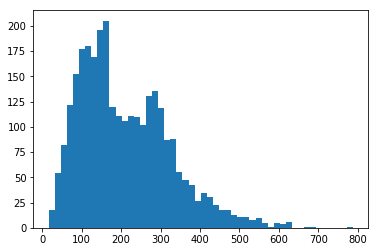

In [118]:
import matplotlib.pyplot as plt

plt.hist(lengths,50)

In [14]:
def test_chunk_data_size(chunks):
    # confirm samples are of length NUM_SAMPLES_PER_CHUNK
    for chunk in chunks:
        assert chunk.shape == (NUM_SAMPLES_PER_CHUNK,NUM_MEASUREMENTS_PER_SAMPLE)
        

def test_chunk_toy_data():
    ##################### TEST #####################
    # description: test perfect coverage of chunk 
    data = [np.array([[0, 1], 
                     [0, 2],
                     [1, 3],
                     [1, 4],
                     [0, 5],
                     [0, 6]])]
    # order: samples per chunk, meas per sample, chunks per recording
    out = chunk_data(data, 2, 1, 1)
    assert np.all(out == np.array([[3],[4]]))
    
    ##################### TEST #####################
    # description: test perfect coverage of chunk, 2 recordings
    data = [np.array([[0, 1], 
                     [0, 2],
                     [1, 3],
                     [1, 4],
                     [0, 5],
                     [0, 6]]), 
            np.array([[0, 1], 
                     [0, 2],
                     [1, 3],
                     [1, 4],
                     [0, 5],
                     [0, 6]])]
    # order: samples per chunk, meas per sample, chunks per recording
    out = chunk_data(data, 2, 1, 1)
    assert np.all(out[0] == np.array([[3],[4]]))
    assert np.all(out[1] == np.array([[3],[4]]))
    
    ##################### TEST #####################
    # description: test grabbing prev/following values if button press inds < chunk size
    data = [np.array([[0, 1], 
                     [0, 2],
                     [1, 3],
                     [1, 4],
                     [0, 5],
                     [0, 6]])]
    out = chunk_data(data, 3, 1, 2)
    assert np.all(out[0] == np.array([[2],[3],[4]]))
    assert np.all(out[1] ==  np.array([[3],[4],[5]]))
    
    ##################### TEST #####################
    # description: test grabbing prev with potential out of bounds error at beginning with 1 chunk
    data = [np.array([[1, 1], 
                     [1, 2],
                     [1, 3],
                     [0, 4],
                     [0, 5],
                     [0, 6]])]
    out = chunk_data(data, 4, 1, 1)
    assert np.all(out[0] == np.array([[1],[2],[3],[4]]))
    
    ##################### TEST ####################
    # description: test grabbing prev with potential out of bounds error at beginning with 2 chunks
    data = [np.array([[1, 1], 
                     [1, 2],
                     [1, 3],
                     [0, 4],
                     [0, 5],
                     [0, 6]])]
    out = chunk_data(data, 4, 1, 2)
    assert np.all(out[0] == np.array([[1],[2],[3],[4]]))
    assert np.all(out[1] == np.array([[1],[2],[3],[4]]))
    
    
    ##################### TEST #####################
    # description: test grabbing prev with potential out of bounds error at end with 1 chunk
    data = [np.array([[0, 1], 
                     [0, 2],
                     [0, 3],
                     [0, 4],
                     [1, 5],
                     [1, 6]])]
    out = chunk_data(data, 3, 1, 1)
    assert np.all(out[0] == np.array([[4],[5],[6]]))
    
     ##################### TEST #####################
    # description: test grabbing prev with potential out of bounds error at end with 2 chunks
    data = [np.array([[0, 1], 
                     [0, 2],
                     [0, 3],
                     [0, 4],
                     [1, 5],
                     [1, 6]])]
    out = chunk_data(data, 3, 1, 2)
    assert np.all(out[0] == np.array([[4],[5],[6]]))
    assert np.all(out[1] == np.array([[4],[5],[6]]))
    
    ##################### TEST #####################
    # description: test full sample in recording with uneven split
    data = [np.array([[1, 1], 
                     [1, 2],
                     [1, 3],
                     [1, 4],
                     [1, 5],
                     [1, 6],
                     [1, 7]])]
    
    # num_samples_pressed >= NUM_SAMPLES_PER_CHUNK + NUM_CHUNKS_PER_RECORDING ? 7 > 2 + 3 = 5 yes
    # step: num_samples_pressed // NUM_CHUNKS_PER_RECORDING = 7 // 3 = 2
    out = chunk_data(data, 2, 1, 3) # step: (7-3)//2 = 2
    assert np.all(out[0] == np.array([[1],[2]])) # first
    assert np.all(out[1] == np.array([[6],[7]])) # middle
    assert np.all(out[2] ==  np.array([[3],[4]])) # last
    
    
    ##################### TEST #####################
    # description: test chunk size that is greater than recording size
    data = [np.array([[0, 1], 
                     [0, 2],
                     [1, 3],
                     [1, 4],
                     [0, 5],
                     [0, 6]])]
    out = chunk_data(data, 8, 1, 1)
    assert np.all(out == np.array([[1],[2],[3],[4],[5],[6],[0],[0]]))
    
    data = [np.array([[0,1, 1,1], 
                     [0, 1,2,1],
                     [1, 1,3,2],
                     [1,1, 4,1],
                     [1,1, 4,1],
                     [1,1,1, 4],
                     [0, 1,5,1],
                     [0,1, 6,1]])]
    out = chunk_data(data, 8, 3, 1)
    print(out)
    
# test_chunk_data_size(chunks)
test_chunk_toy_data()
print("success!")

[array([[1, 1, 1],
       [1, 2, 1],
       [1, 3, 2],
       [1, 4, 1],
       [1, 4, 1],
       [1, 1, 4],
       [1, 5, 1],
       [1, 6, 1]]), array([[1, 1, 1],
       [1, 2, 1],
       [1, 3, 2],
       [1, 4, 1],
       [1, 4, 1],
       [1, 1, 4],
       [1, 5, 1],
       [1, 6, 1]])]
success!
